# Problem Set 4

### MACSS 301000, Winter 2018

#### Tyler Amos (tamos)

#### Imports

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# Deal with deprecation warnings
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as stat
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import random
random.seed(10)

# 1. Multiple Linear Regression 
# a) Import and Clean Data

In [328]:
def import_clean(printer=True):
    # Import data, replacing '?' with NA.
    autos = pd.read_csv('https://raw.githubusercontent.com/UC-MACSS/persp-model_W18/master/ProblemSets/PS4/Auto.csv',
                       na_values = '?')
    autos_num = autos[autos.columns.drop("name")]
    hp_missing = autos_num.horsepower.isna()
    hp_mean = autos_num.horsepower.mean()
    hp_median = autos_num.horsepower.median()
    if printer:
        autos.head()
        print("Before Cleanup: Are there any missing values?")
        # We see that there is only one column with missing data, horsepower
        for i, j in autos_num.iteritems():
            print(j.isna().any(), i)
        print("This is the mean of horsepower:{}".format(hp_mean))
        print("\nQuickly plotting horsepower, we see the bulk of the distribution sits low with respect to horsepower. \nSome extreme values skew the mean upwards of 100HP. So let's go with the median rather than the mean.")
        autos_num.horsepower.plot.box()
        print("Replace the missing values in horsepower with the median, {}".format(hp_median))
    autos_num.horsepower[hp_missing] = hp_median
    # Checking again, we see that there are now no missing values
    if printer:
        print("\nAfter Cleanup: Are there any missing values?")
        for i, j in autos_num.iteritems():
            print(j.isna().any(), i)
    return autos_num


Before Cleanup: Are there any missing values?
False mpg
False cylinders
False displacement
True horsepower
False weight
False acceleration
False year
False origin
This is the mean of horsepower:104.46938775510205

Quickly plotting horsepower, we see the bulk of the distribution sits low with respect to horsepower. 
Some extreme values skew the mean upwards of 100HP. So let's go with the median rather than the mean.
Replace the missing values in horsepower with the median, 93.5

After Cleanup: Are there any missing values?
False mpg
False cylinders
False displacement
False horsepower
False weight
False acceleration
False year
False origin


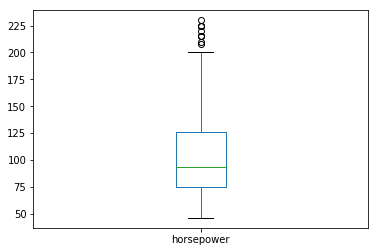

In [329]:
autos_num = import_clean(printer = True)

# b) Scatterplot Matrix


 Scatter Matrix for Non-String Values in Autos Dataset


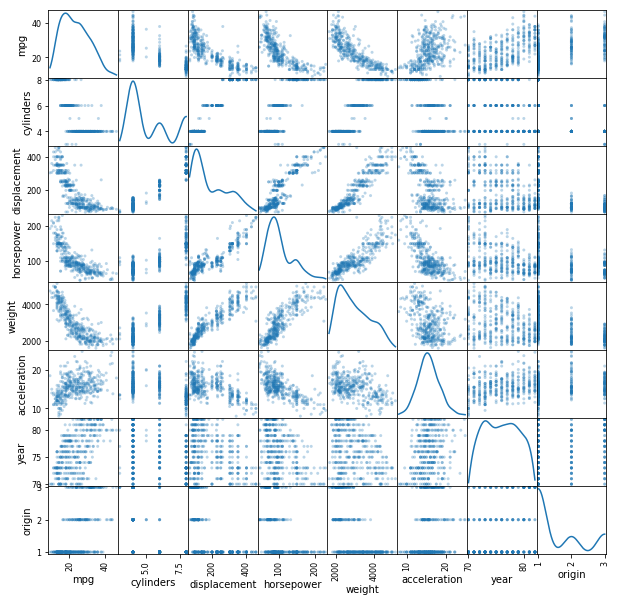

In [330]:
from pandas.plotting import scatter_matrix
print('\n Scatter Matrix for Non-String Values in Autos Dataset')
scatter_matrix(autos_num, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

# c) Correlation Matrix

In [331]:
autos_num.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.773582,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.841536,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.895765,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.773582,0.841536,0.895765,1.000000,0.862590,-0.688167,-0.413992,-0.452943
weight,-0.831739,0.897017,0.933104,0.862590,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.688167,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413992,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.452943,-0.581265,0.210084,0.184314,1.000000


# d) Estimate Multiple Linear Regression Model

$ mpg_i = \beta_0 + \beta_1 cylinders_i + \beta_2 displacement_i + \beta_3 horsepower_i + \beta_4 weight_i + \beta_5 acceleration_i + \beta_6 year_i + \beta_7 origin_i + u_i$

Where $ u_i is $ the error for observation $i$.

In [332]:
# Set up the model by splitting into exogenous and endogenous variables
autos_d = import_clean(printer=False)
# No need to add a constant, the from_formula method does this for us as Intercept.
model_string = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
model = stat.OLS.from_formula(formula = model_string, data = autos_d).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.1
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.22e-141
Time:                        16:13:29   Log-Likelihood:                -1037.3
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.4740      4.621     -3.998      0.000     -27.559      -9.389
cylinders       -0.4498      0.323     -1.395      0.164      -1.084       0.184
displacement     0.0192      0.008      2.555      0.011       0.004       0.034
horsepower      -0.0110      0.014     -0.815      0.415      -0.038       0.016
weight          -0.0067      0.001    -10.410      0.000      -0.008      -0.005
acceleration     0.1108      0.097      1.137      0.256      -0.081       0.302
year             0.7611      0.051     15.031      0.000       0.662       0.861
origin           1.4057      0.276      5.093      0.000       0.863       1.948
==============================================================================
Omnibus:                       29.910   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.012
Skew:                           0.508   Prob(JB):                     3.75e-11
Kurtosis:                       4.367   Cond. No.                     8.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## i) Statistical Significance at the 1% level

At the 0.01 level, the following coefficients are significant, as indicated by their associated p-values. Let $p(x)$ be the p-value of the variable $x$:
   * $p(weight_i) < 0.01$
   * $p(year_i) < 0.01$
   * $p(origin_i) < 0.01$

## ii) Not Statistically Significant at the 10% level

At the 0.10 level, the following coefficients are not significant, as indicated by their associated p-values. Let $p(x)$ be the p-value of the variable $x$:
   * $p(horsepower_i) > 0.40$
   * $p(acceleration_i) > 0.2$
   * $p(cylinders_i) > 0.16$

## iii) Interpreting $\beta_6 year_i$

$\beta_6$ has the estimated value $\approx 0.76$. It is associated with the variable $year_i$. In words, this means that for each year later in the model of the car (e.g., 1985 model year vs 1986 model year), there is $\approx$ 0.76 mile increase in fuel efficiency across the data, as measured in miles per gallon. 


# e) Identifying three variables likely to have non-linear relationships with $mpg_i$

Based on the scatterplot from part (b), we can say that $displacement_i$, $horsepower_i$, and $weight_i$ are most likely to have non-linear relationships with $mpg_i$. The reasons for these assertions are three-fold:

   * $displacement_i$, $horsepower_i$ and $weight_i$ all display clear exponential tendencies, with a smooth curve. This is exponential decay. That is, for each unit of increase in one of these three variables, $mpg_i$ decreases by some exponential factor.
   * While $origin_i$ and $acceleration_i$ do not appear to be perfectly linear, they display more spread and would likely be fit more closely by a linear model. 
   * Intuition and subject matter knowledge confirm these conclusions. Displacement (the size of cylinders), horsepower (the 'speed' of a car), and weight are all related features of a car. Larger displacement engines can produce more torque, but also weigh more. Larger displacement engines are likely to also produce more horsepower up to the point where weight begins to reduce horsepower. With respect to gas mileage ($mpg_i$), intuition and subject matter knowledge confirm these three variables are all likely to reduce gas mileage. 
   
## i) A new model with squared terms on $displacement_i$, $horsepower_i$, $weight_i$, and $acceleration_i$

In [333]:
autos_e = import_clean(printer=False)
squares = ['displacement', 'horsepower', 'weight', 'acceleration']
for i in squares:
    autos_e[i + "sq"] = autos_e[i]**2
# Again, no need for a constant term, as the from_formula method will add it in for us as Intercept.
model_string = 'mpg ~ cylinders + displacement + displacementsq + horsepower + horsepowersq + weight  + weightsq + acceleration + accelerationsq + year + origin '
model = stat.OLS.from_formula(formula = model_string, data = autos_e).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     231.5
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          3.94e-162
Time:                        16:13:30   Log-Likelihood:                -976.64
No. Observations:                 397   AIC:                             1977.
Df Residuals:                     385   BIC:                             2025.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.5161      6.706      2.761      0.006       5.332      31.700
cylinders          0.2583      0.327      0.789      0.431      -0.385       0.902
displacement      -0.0175      0.021     -0.854      0.394      -0.058       0.023
displacementsq  2.556e-05   3.62e-05      0.706      0.480   -4.56e-05    9.67e-05
horsepower        -0.1319      0.039     -3.342      0.001      -0.209      -0.054
horsepowersq       0.0003      0.000      2.376      0.018     5.6e-05       0.001
weight            -0.0150      0.003     -5.683      0.000      -0.020      -0.010
weightsq         1.66e-06   3.66e-07      4.537      0.000    9.41e-07    2.38e-06
acceleration      -2.0152      0.559     -3.606      0.000      -3.114      -0.917
accelerationsq     0.0573      0.017      3.465      0.001       0.025       0.090
year               0.7957      0.044     17.922      0.000       0.708       0.883
origin             0.5579      0.262      2.132      0.034       0.043       1.072
==============================================================================
Omnibus:                       33.164   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.029
Skew:                           0.440   Prob(JB):                     8.41e-17
Kurtosis:                       4.923   Cond. No.                     5.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Adjusted R-squared Comparison

The adjusted R-squared value from part (d) $\approx$ 0.818. The adjusted R-Squared from part (e) $\approx$ 0.865. The results from (e) indicate a stronger correlation when squared terms are added. The adjusted R-squared value indicates that this stronger correlation holds even when accounting for a larger number of variables. This suggests that the second model (e) better describes the relationships between the exogenous variables and the endogenous variable. 

## ii) Statistical Significance of $displacement_i$

The statistical significance of $displacement_i$ has degraded. The first mode in (d) had a coefficient $\approx$ 0.01 and a p-value of $\approx 0.011$. In (e) the coefficient is $\approx -0.017$ with a p-value of $\approx 0.394$. The squared term has a coefficient $\approx $ 2.5e-05 and p-value $\approx 0.4$. 

_Comparison to Intuition_

These changes indicate that in the model (d), displacement likely (0.05 threshold) had a small positive linear impact on gas mileage. However, in the second model (e), displacement is unlikely to have a small negative linear impact on gas mileage (note the sign on the coefficient changed). The squared term, in a similar fashion, is unlikely to have a small negative impact on gas mileage. In conclusion, in the second model (e), overall displacement became less statistically significant. 

## iiI) Statistical Significance of $cylinders_i$

The statistical significance of $cylinders_i$ has also degraded. The first model in (d) had a coefficient $\approx$ -0.44 and a p-value of $\approx 0.16$. In (e) the coefficient is $\approx 0.25$ with a p-value of $\approx 0.431$. The sign of the coefficient has also changed, from negative in (d) to positive in (e). 

_Comparison to Intuition_

It is broadly true that more cylinders will reduce fuel economy, thus the first model results do make intuitive sense. However, when we account for a more complex relationship in the second model, we see that cylinders is a) not negatively correlated and b) not as likely to impact overall fuel economy. This also makes intuitive sense. A small engine with few cylinders will have to turn over more (more rotations per minute, RPM) to maintain the same speed as compared to a larger engine with many cylinders that can maintain high speeds with fewer RPM, resulting in better fuel economy.  

## Discussion

While both sets of results pass some version of the "smell test", the second model (e) is stronger. Note that horsepower is the "performance"/speed of a car. It is a function of, primarily, torque and rotational speed of axes. Note also that acceleration is a function of weight and torque (which is itself determined mostly by displacement and cylinders). 

All of these characteristics contribute to fuel economy to a point. However deficiency or excess in any category can lead to poor fuel economy. For example, very fast cars with a great deal of horsepower or trucks with large amounts of torque typically have poor fuel economy. Cars which do not have sufficient horsepower or torque will also run at higher RPMs, leading to poor fuel economy. This suggests a non-linear relationship. By accounting for the non-linear effect of horsepower, weight, and acceleration on fuel economy with squared terms, the explanatory power of displacement and the number of cylinders (which together determine torque) is reduced. Results with respect to other variables such as year do not contradict this intuition, as later-model cars will be more fuel efficient.  

# f) Prediction

In [334]:
autos_f = import_clean(printer=False)
squares = ['displacement', 'horsepower', 'weight', 'acceleration']
for i in squares:
    autos_f[i + "sq"] = autos_f[i]**2
# Again, no need for a constant term, as the from_formula method will add it in 
# for us as Intercept.
model_string = 'mpg ~ cylinders + displacement + displacementsq + horsepower + horsepowersq + weight  + weightsq + acceleration + accelerationsq + year + origin '
model = stat.OLS.from_formula(formula = model_string, data = autos_f).fit()
# Set up predictor variable values, omitting constant as it is handled by the from_formula method
inputs = np.array([6, 200, 100, 3100, 15.1, 99, 1, 200**2,100**2, 3100**2, 15.1**2,])
input_df = pd.DataFrame(inputs).T
input_df.columns = autos_f.columns[1:]
print("Specified Exogenous Variable Values:\n", input_df)
print("The predicted gas mileage for a car with the specified exogenous variable values is {}".format(model.predict(input_df).values[0]))

Specified Exogenous Variable Values:
    cylinders  displacement  horsepower  weight  acceleration  year  origin  \
0        6.0         200.0       100.0  3100.0          15.1  99.0     1.0   

   displacementsq  horsepowersq   weightsq  accelerationsq  
0         40000.0       10000.0  9610000.0          228.01  
The predicted gas mileage for a car with the specified exogenous variable values is 38.97571031919111


# 2. Classification Problem With KNN

## a) Computing the Euclidean Distance between each observation

In [335]:
obs = np.zeros([6,4])
# Let 0 = Red, 1 = Green
obs[0] = [0,3,0,0]
obs[1] = [2,0,0,0]
obs[2] = [0,1,3,0]
obs[3] = [0, 1,2, 1]
obs[4] = [-1, 0, 1, 1]
obs[5] = [1,1,1,0]
obs_exog = obs[:,:-1]
obs_endog = obs[:,-1]
test_point = np.array([0,0,0])
def euc_dist(p,q):
    return ((p[0]-q[0])**2) + ((p[1]-q[1])**2) + ((p[2]-q[2])**2)
dist_list = []
for i in obs_exog:
    dist_list.append(euc_dist(i, test_point))
place = 1
for i in dist_list:
    print("Observation #" + str(place) +" distance is " + str(i))
    place += 1

Observation #1 distance is 9.0
Observation #2 distance is 4.0
Observation #3 distance is 10.0
Observation #4 distance is 5.0
Observation #5 distance is 2.0
Observation #6 distance is 3.0


# b) KNN Prediction with $K=1$

Our KNN prediction with $K=1$ would point us towards Observation 5, which is Green. Green is the only option, so the trivial solution is the prediction $Y=$ Green.

# c) KNN Prediction with $K = 3$

With $K=3$, we are now looking at Observations  5, 6, and 2. These are, respectively, Green, Red, and Red. The majority of items are Red, thus we would predict $Y=$ Red. Mathematically:

$p(y_{red}) = \frac{1}{k} \sum_{i=red} I$ 

Where $I$ is the indicator random variable (1 if an eligible data point exists, 0 otherwise). So we can say:
$p(y_{red}) = \frac{2}{3} \approx 0.6 > (1-\frac{2}{3})$

Therefore the probability the node is Red is higher than the probability the node is Green and we can make the prediction that it is Red. 

# d) Highly Non-Linear Bayes Optimal Decision Boundary

With a highly non-linear Decision Boundary, we expect the best value for $K$ to be small. This is because the non-linear nature of the decision boundary tells us the classifier requires a sufficient amount of granularity in order to capture the dynamics of the data. A large $K$ would underfit the data, losing information and degrading the quality of the classifier. That being said, a $K$ which is too small would also degrade the quality of the classifier as it would over-fit the data. 

# e) KNN Implementation from a Package

In [336]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)
knn_fit = knn.fit(obs_exog, np.array(['Red','Red','Red','Green','Green','Red']))
predictors = np.array([1,1,1]).reshape(1,3)
print("The predicted value with exogenous variables {} using a canned function is {}.".format([1,1,1], knn_fit.predict(predictors)[0]))


The predicted value with exogenous variables [1, 1, 1] using a canned function is Green.


# 3. Multivariable Logistic Regression

$mpg_{high} = 1  $ if $ mpg_{j} \geq median(mpg)$

$mpg_{high} = 0  $ if $ mpg_{j} < median(mpg)$

# a) Use statsmodel.api to estimate logistic regression

We see that $weight_i$ and $year_i$ are statistically significant at 5%. 

In [337]:
# import auto
autos_num = import_clean(printer=False)
autos_num['mpg_high'] = [1 if i >= np.median(autos_num.mpg) else 0 for i in autos_num.mpg]
# No need to add constant, as from_formula does this for us as Intercept
model = 'mpg_high ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
logit_model = stat.Logit.from_formula(model, data = autos_num).fit()
print("The following variables are statistically significant at the 5% level.\n Regressor, p-value\n", logit_model.pvalues[logit_model.pvalues <= 0.05])

Optimization terminated successfully.
         Current function value: 0.200385
         Iterations 9
The following variables are statistically significant at the 5% level.
 Regressor, p-value
 Intercept    2.510885e-03
weight       9.832396e-05
year         8.963344e-09
dtype: float64


# b) Create training and test sets

In [338]:
ycols = autos_num['mpg_high']
xcols = autos_num.iloc[:,:-1]
xcols['Intercept'] = 1
X_train, X_test, y_train, y_test = train_test_split(xcols, ycols, test_size = 0.5, random_state=10)

# c) Use scikit-learn to estimate a logistic regression model

In [339]:
logistic = LogisticRegression()
log_fit = logistic.fit(X_train, y_train)
print("Coefficient values are: ")
place = 0
for i in log_fit.coef_.tolist():
    for j in i:
        print(X_train.columns[place], j)
        place += 1

Coefficient values are: 
mpg 1.6884371265219342
cylinders -0.24215649986322596
displacement -0.00551104925381279
horsepower -0.07567317576681097
weight -0.001048268252337858
acceleration -0.749760278107137
year -0.16981020704743263
origin -0.4232995940448952
Intercept -0.11892435702705981


# d) Predicted values for the test set

In [340]:
predicted_y = log_fit.predict(X_test)

confusion = pd.DataFrame(confusion_matrix(y_test, predicted_y), columns = ["Positive", "Negative"], index = ["Positive", "Negative"])
print("Confusion Matrix:\n", confusion)

class_report = classification_report(y_test, predicted_y)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
           Positive  Negative
Positive       105         1
Negative         3        90

Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.99      0.98       106
          1       0.99      0.97      0.98        93

avg / total       0.98      0.98      0.98       199



Note that recall is the proportion of True Positives relative to all positives (False Negatives and True Positives). Precision is the proportion of True Positives relative to all predicted Positives. 

Considering the above definitions, we can draw the following conclusions about the effectiveness of this classifier:

   1. The classifier better predicts vehicles that have high gas mileage (1) than those that do have low gas mileage (0).
   
   2. The classifier better predicts vehicles with low gas mileage (0) than high gas mileage (1). 
   
Put differently, the classifier is slightly more likely to correctly predict that a vehicle has good gas mileage when it does in fact have good gas mileage. It is also slightly more likely to predict a vehicle has poor gas mileage when it does in fact have poor gas mileage. 

### Conclusion: Trivial Difference
Overall, these differences are trivial - the averages of precision and recall are equivalent. Thus we can conclude that in practice the classifier is equally able to predict low and high mileage. 